In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
start_dt = datetime.datetime(2006, 4, 26)
end_dt = datetime.datetime(2012, 4, 9)

In [4]:
import pandas.io.data as web
EWA = web.DataReader("EWA", 'yahoo', start_dt, end_dt)
EWC = web.DataReader("EWC", 'yahoo', start_dt, end_dt)
IGE = web.DataReader("IGE", 'yahoo', start_dt, end_dt)

In [70]:
y3 = pd.concat(
    [EWC['Adj Close'], EWA['Adj Close'], IGE['Adj Close']], 
    axis=1, keys=['EWC', 'EWA', 'IGE'])

In [25]:
from johansen.johansen import coint_johansen

In [88]:
jo = coint_johansen(y3, 0, 1)

(1499, 3)
(1499, 3)
rkt (1498, 3) (1498, 3)


In [89]:
jo.lr1

array([ 34.57480407,  16.86688747,   4.39480573])

In [73]:
jo.cvt

array([[ 27.0669,  29.7961,  35.4628],
       [ 13.4294,  15.4943,  19.9349],
       [  2.7055,   3.8415,   6.6349]])

In [74]:
jo.lr2

array([ 17.7079166 ,  12.47208173,   4.39480573])

In [75]:
jo.cvm

array([[ 18.8928,  21.1314,  25.865 ],
       [ 12.2971,  14.2639,  18.52  ],
       [  2.7055,   3.8415,   6.6349]])

In [82]:
jo.evec

array([[-1.23433309, -0.57165924,  0.33823496],
       [ 1.08199398, -0.1840303 ,  0.08493198],
       [ 0.26901663,  0.54734574, -0.12030599]])

In [90]:
weights = jo.evec[:,0]
yport = (weights * y3).sum(axis=1)

In [84]:
import mean_reversion as mr
mr.halflife(yport)

array([ 21.11620658])

In [99]:
import statsmodels.tsa.stattools as sms
sms.adfuller(yport)

(-3.4169431706500433,
 0.010394663460895872,
 12,
 1487,
 {'1%': -3.434755261885587,
  '10%': -2.5678058366095038,
  '5%': -2.8634856391739838},
 113.32673020780612)

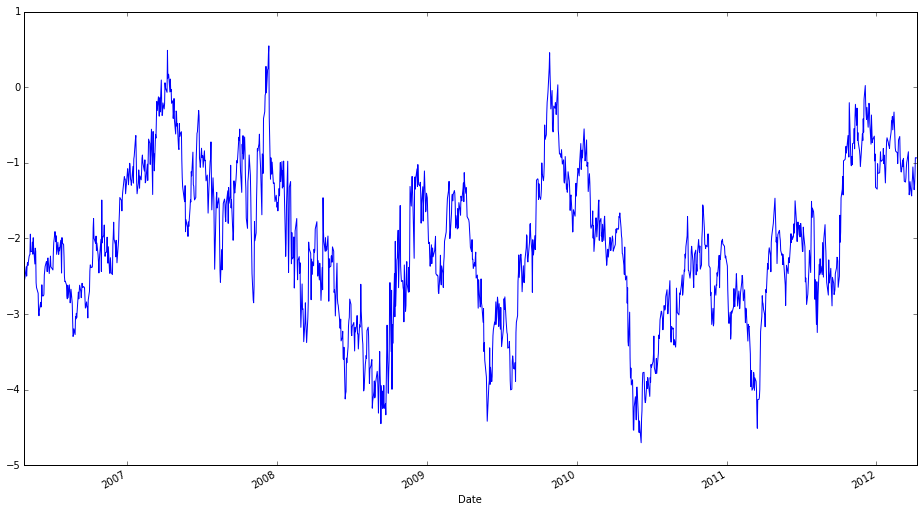

In [100]:
yport.plot(figsize=(16,9))